<a href="https://colab.research.google.com/github/chiruconew/REP_PRUEBA/blob/main/ProyFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [39]:
url = 'https://raw.githubusercontent.com/chiruconew/PROYECTO_FEATURE/main/proyecto_final_prestamos.csv'
df  = pd.read_csv(url)

In [40]:
df.head()

,NUMERO,FECHA,AGENTE,DEPARTAMENTO,DPI,MONTO,INTERES,MESES,CANAL,DIAS_ATRASO,PERFIL_INTERNO,ESTADOCIVIL,SEXO,EDAD,CLASE
0,31020009895,13/07/2019,46074151,QUETZALTENANGO,2368530000000,500,64,6,3,326,6,C,M,39,1
1,10010010365,14/06/2019,46074151,QUETZALTENANGO,2263550000000,500,64,6,1,451,6,C,F,34,1
2,10010010347,11/06/2019,46074151,QUETZALTENANGO,1633060000000,300,124,3,1,62,3,C,M,59,0
3,10010010676,04/07/2019,46074151,QUETZALTENANGO,3499420000000,800,64,6,1,371,7,C,F,25,1
4,10010010711,09/07/2019,46074151,QUETZALTENANGO,1809290000000,300,124,3,1,100,6,C,M,53,0


In [41]:
df_numerica = df[['MONTO','INTERES','MESES','CANAL','DIAS_ATRASO','PERFIL_INTERNO','EDAD']]
df_category = df[['DEPARTAMENTO','AGENTE']]
df_nums.head()

,MONTO,INTERES,MESES,CANAL,DIAS_ATRASO,PERFIL_INTERNO,EDAD
0,500,64,6,3,326,6,39
1,500,64,6,1,451,6,34
2,300,124,3,1,62,3,59
3,800,64,6,1,371,7,25
4,300,124,3,1,100,6,53


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8538c622d0>,
      dtype=object)

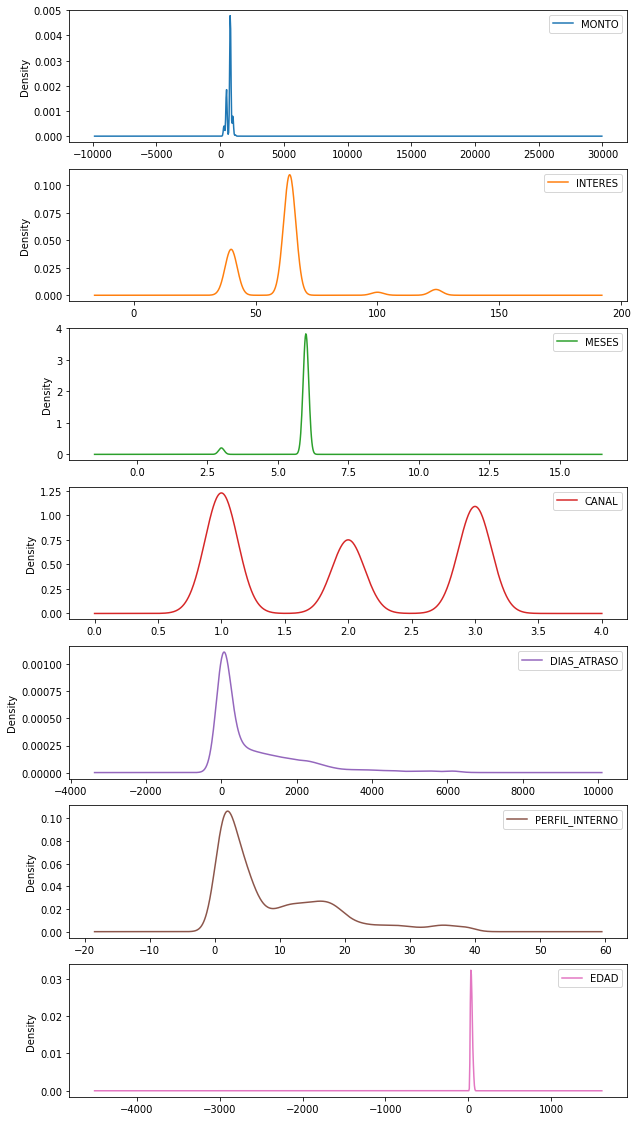

In [42]:
df_nums.plot.kde(subplots=True, figsize=(10,20), sharex=False)

In [43]:
df_nums.describe()

,MONTO,INTERES,MESES,CANAL,DIAS_ATRASO,PERFIL_INTERNO,EDAD
count,13385.000000,13385.000000,13385.000000,13385.000000,13385.000000,13385.000000,13385.000000
mean,733.119163,60.328427,5.849160,1.955248,843.639597,9.104595,38.310497
std,329.082964,16.748295,0.661718,0.868102,1213.134904,9.183368,28.606043
min,100.000000,36.000000,3.000000,1.000000,2.000000,1.000000,-2981.000000
25%,500.000000,40.000000,6.000000,1.000000,33.000000,2.000000,29.000000
50%,800.000000,64.000000,6.000000,2.000000,235.000000,5.000000,37.000000
75%,800.000000,64.000000,6.000000,3.000000,1288.000000,15.000000,46.000000
max,20000.000000,140.000000,12.000000,3.000000,6730.000000,40.000000,81.000000


In [44]:
df_nums1 = df_nums[df_nums['MONTO'] < 10000]
df_nums1.describe()

,MONTO,INTERES,MESES,CANAL,DIAS_ATRASO,PERFIL_INTERNO,EDAD
count,13380.000000,13380.000000,13380.000000,13380.000000,13380.000000,13380.000000,13380.000000
mean,728.161435,60.336024,5.848206,1.955157,843.928924,9.107250,38.312631
std,183.203991,16.746813,0.657550,0.868217,1213.268332,9.184032,28.611132
min,100.000000,36.000000,3.000000,1.000000,2.000000,1.000000,-2981.000000
25%,500.000000,40.000000,6.000000,1.000000,33.000000,2.000000,29.000000
50%,800.000000,64.000000,6.000000,2.000000,235.000000,5.000000,37.000000
75%,800.000000,64.000000,6.000000,3.000000,1288.000000,15.000000,46.000000
max,1500.000000,140.000000,6.000000,3.000000,6730.000000,40.000000,81.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8539497110>,
      dtype=object)

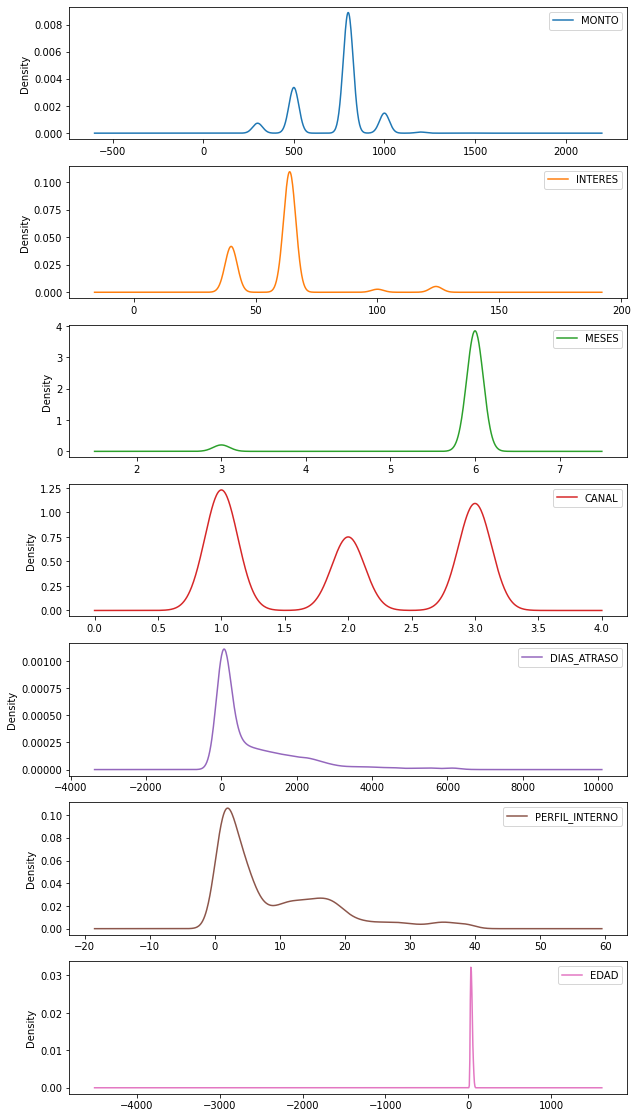

In [45]:
df_nums1.plot.kde(subplots=True, figsize=(10,20), sharex=False)

In [52]:
df_nums1.loc[df['MONTO'] == 100, 'OTRA'] = 'CIEN'
df_nums1.loc[df['MONTO'] == 300, 'OTRA'] = 'TRECIENTOS'
df_nums1.loc[df['MONTO'] == 500, 'OTRA'] = 'QUINIENTOS'
df_nums1.loc[df['MONTO'] == 800, 'OTRA'] = 'OCHOCIENTOS'
df_nums1.loc[df['MONTO'] == 1000, 'OTRA'] = 'UNMIL'
df_nums1.loc[df['MONTO'] == 1200, 'OTRA'] = 'MILDOSCIENTOS'
df_nums1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,MONTO,INTERES,MESES,CANAL,DIAS_ATRASO,PERFIL_INTERNO,EDAD,OTRA
0,500,64,6,3,326,6,39,QUINIENTOS
1,500,64,6,1,451,6,34,QUINIENTOS
2,300,124,3,1,62,3,59,TRECIENTOS
3,800,64,6,1,371,7,25,OCHOCIENTOS
4,300,124,3,1,100,6,53,TRECIENTOS


In [53]:
df_nums1['OTRA'].value_counts()

OCHOCIENTOS      8171
QUINIENTOS       3094
UNMIL            1356
TRECIENTOS        674
MILDOSCIENTOS      75
CIEN                3
Name: OTRA, dtype: int64

In [51]:
df_nums1['MONTO'].value_counts()

800     8171
500     3094
1000    1356
300      674
1200      75
1500       7
100        3
Name: MONTO, dtype: int64

In [55]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.3MB/s 


In [61]:
from category_encoders import CountEncoder

In [67]:
count_enc_monto = CountEncoder(normalize=True)

In [68]:
count_enc_monto.fit_transform(df_nums1['OTRA'])

,OTRA
0,0.231241
1,0.231241
2,0.050374
3,0.610688
4,0.050374
...,...
13380,0.101345
13381,0.101345
13382,0.610688
13383,0.101345


In [69]:
count_enc_monto.mapping

{'OTRA': OCHOCIENTOS      0.610688
 QUINIENTOS       0.231241
 UNMIL            0.101345
 TRECIENTOS       0.050374
 MILDOSCIENTOS    0.005605
 NaN              0.000523
 CIEN             0.000224
 Name: OTRA, dtype: float64}

In [70]:
count_enc_depto = CountEncoder(normalize=True)

In [71]:
count_enc_monto.fit_transform(df_nums1['AGENTE'])

KeyError: ignored